In [11]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns#Understanding my variables 

%matplotlib inline

df = pd.read_csv('filing_counts.csv')

print(df)

df.info()
df.head()

DeleteList=['for_total', 'case_action']
df=df.drop(DeleteList, axis=1)

# set identifier "case_type" as string
df['case_type'] = df['case_type'].astype('str')
# set categorical data
df['case_action'] = df['case_action'].astype('category')
df['state'] = df['state'].astype('category')
df['case_action'] = df['case_action'].astype('category')
df['age_group'] = df['age_group'].astype(str).str.strip().astype('category')

# set integer data
df['count'] = df['count'].astype('int64')
df


eda(df)

         state  year         case_action          case_type      age_group  \
0       Alaska  2020           Ambiguous          G+C+Joint  Adults+Minors   
1       Alaska  2019           Ambiguous          G+C+Joint  Adults+Minors   
2       Alaska  2018           Ambiguous          G+C+Joint  Adults+Minors   
3       Alaska  2017           Ambiguous          G+C+Joint  Adults+Minors   
4      Arizona  2020           Ambiguous  Guardianship ONLY    Adults ONLY   
..         ...   ...                 ...                ...            ...   
375  Wisconsin  2020  Initiated+Reopened          G+C+Joint  Adults+Minors   
376  Wisconsin  2019  Initiated+Reopened          G+C+Joint  Adults+Minors   
377  Wisconsin  2018  Initiated+Reopened          G+C+Joint  Adults+Minors   
378  Wisconsin  2017  Initiated+Reopened          G+C+Joint  Adults+Minors   
379  Wisconsin  2016  Initiated+Reopened          G+C+Joint  Adults+Minors   

     count for_total  
0     1171         Y  
1     1084       

NameError: name 'eda' is not defined

In [45]:

df.columns



Index(['state', 'year', 'case_action', 'case_type', 'age_group', 'count',
       'for_total'],
      dtype='object')

In [46]:
df.nunique(axis=0)




state           37
year             6
case_action      4
case_type        4
age_group        4
count          332
for_total        2
dtype: int64

In [54]:
df.age_group.unique()

array(['Adults+Minors', 'Adults ONLY', 'Minors ONLY', 'Ambiguous'],
      dtype=object)

In [12]:
# set identifier "case_type" as string
df['case_type'] = df['case_type'].astype('str')
# set categorical data
df['case_action'] = df['case_action'].astype('category')
df['state'] = df['state'].astype('category')
df['case_action'] = df['case_action'].astype('category')
df['age_group'] = df['age_group'].astype(str).str.strip().astype('category')

# set integer data
df['count'] = df['count'].astype('int64')

KeyError: 'case_action'

Preview of data:


,state,year,case_type,age_group,count
0,Alaska,2020,G+C+Joint,Adults+Minors,1171
1,Alaska,2019,G+C+Joint,Adults+Minors,1084
2,Alaska,2018,G+C+Joint,Adults+Minors,1227



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   state      380 non-null    object
 1   year       380 non-null    int64 
 2   case_type  380 non-null    object
 3   age_group  380 non-null    object
 4   count      380 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.0+ KB
None

No duplicated entries found

To check: 
Unique count of non-numeric data

state        37
case_type     4
age_group     4
dtype: int64
Top 5 unique values of state
            state  Count
0      New Mexico     36
1  North Carolina     30
2        Colorado     30
3        Michigan     24
4           Idaho     18
 
Top 5 unique values of case_type
              case_type  Count
0             G+C+Joint    132
1     Guardianship ONLY    106
2  Conservatorship ONLY     86
3        J

,count,mean,std,min,25%,50%,75%,max
year,380.0,2018.418421,1.264985,2016.0,2017.75,2018.0,2019.0,2021.0
count,380.0,1817.150000,3525.655222,0.0,144.75,592.5,2097.0,28004.0


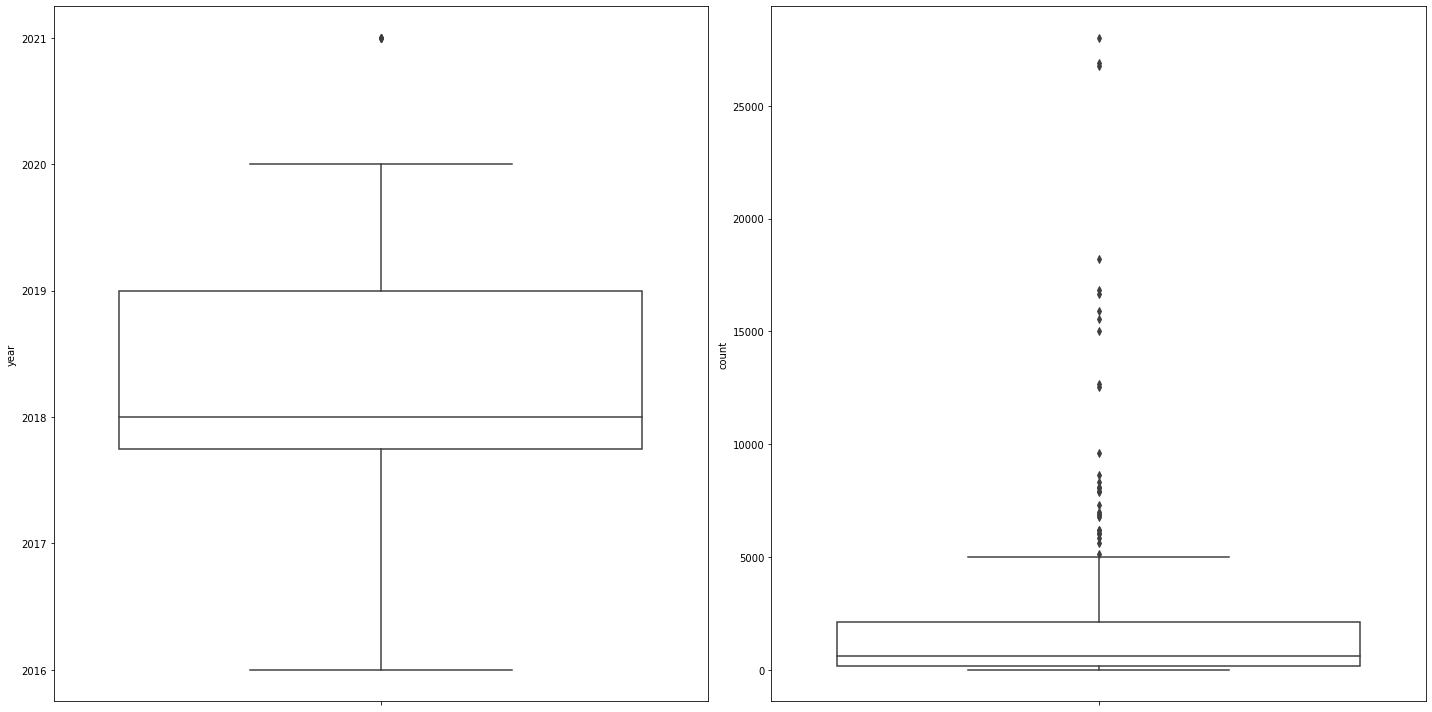


To check pairwise joint distribution of numeric data


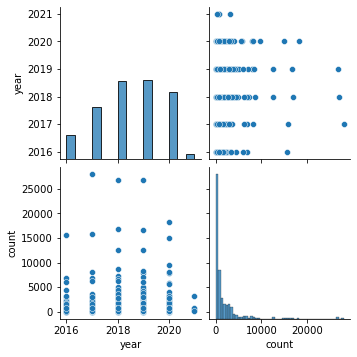


To check time series of numeric data  by daily, monthly and yearly frequency


In [17]:
eda(df)

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)
    

In [15]:
def categorical_eda(df):
    """Given dataframe, generate EDA of categorical data"""
    print("To check: Unique count of non-numeric data")
    print(df.select_dtypes(include=['category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()